In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import optuna

import warnings
warnings.filterwarnings("ignore")

print("Début du notebook.")

Début du notebook.


In [ ]:
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train_cat.csv").squeeze()
y_test = pd.read_csv("../data/processed/y_test_cat.csv").squeeze()
X_train = X_train.drop(columns=["z (Wh/km)", "Erwltp (g/km)", "Fuel consumption", "Electric range (km)"])
X_test = X_test.drop(columns=["z (Wh/km)", "Erwltp (g/km)", "Fuel consumption", "Electric range (km)"])

In [4]:
y_train.value_counts()/len(y_train)*100

Ewltp (g/km)
3    23.736015
4    19.115075
5    17.360008
0    11.181022
1     9.814113
6     9.330151
2     6.476283
7     2.987334
Name: count, dtype: float64


Entraînement du modèle Logistic Regression...
Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     11665
           1       0.99      0.90      0.94     10098
           2       0.71      0.43      0.54      6891
           3       0.71      0.82      0.76     25541
           4       0.65      0.66      0.66     20451
           5       0.73      0.72      0.73     18592
           6       0.77      0.72      0.74      9811
           7       0.87      0.79      0.82      3158

    accuracy                           0.76    106207
   macro avg       0.80      0.75      0.77    106207
weighted avg       0.76      0.76      0.76    106207



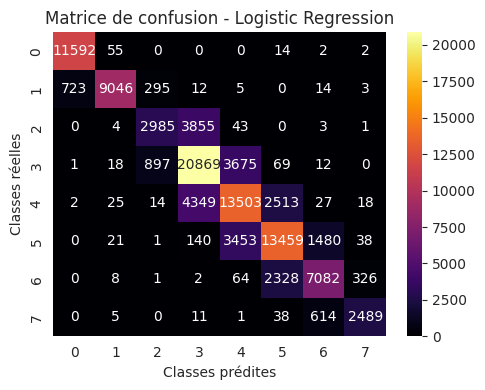


Entraînement du modèle Random Forest Classifier...
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       0.99      1.00      1.00     10098
           2       0.86      0.84      0.85      6891
           3       0.90      0.91      0.90     25541
           4       0.87      0.89      0.88     20451
           5       0.92      0.91      0.92     18592
           6       0.94      0.93      0.94      9811
           7       0.95      0.95      0.95      3158

    accuracy                           0.92    106207
   macro avg       0.93      0.93      0.93    106207
weighted avg       0.92      0.92      0.92    106207



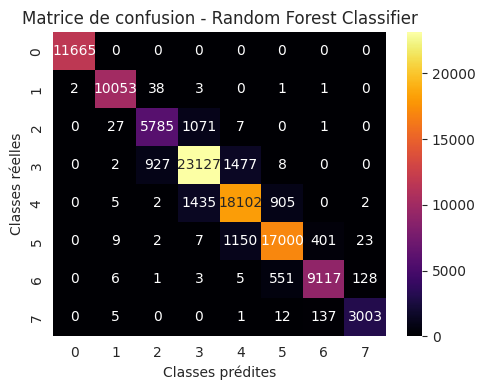


Entraînement du modèle KNN...
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       0.99      0.99      0.99     10098
           2       0.82      0.79      0.80      6891
           3       0.88      0.88      0.88     25541
           4       0.83      0.85      0.84     20451
           5       0.90      0.89      0.89     18592
           6       0.92      0.91      0.91      9811
           7       0.93      0.92      0.93      3158

    accuracy                           0.90    106207
   macro avg       0.91      0.90      0.91    106207
weighted avg       0.90      0.90      0.90    106207



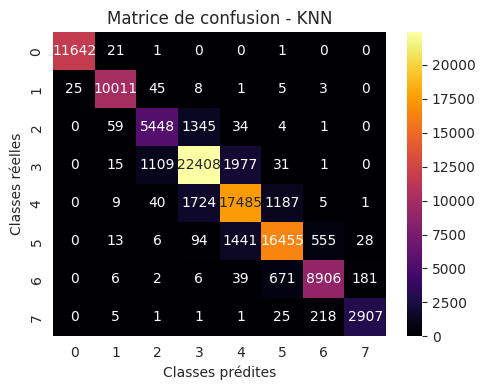


Entraînement du modèle Arbres de décision...
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       0.99      0.99      0.99     10098
           2       0.84      0.85      0.84      6891
           3       0.90      0.90      0.90     25541
           4       0.88      0.88      0.88     20451
           5       0.92      0.91      0.91     18592
           6       0.94      0.92      0.93      9811
           7       0.93      0.95      0.94      3158

    accuracy                           0.92    106207
   macro avg       0.92      0.93      0.93    106207
weighted avg       0.92      0.92      0.92    106207



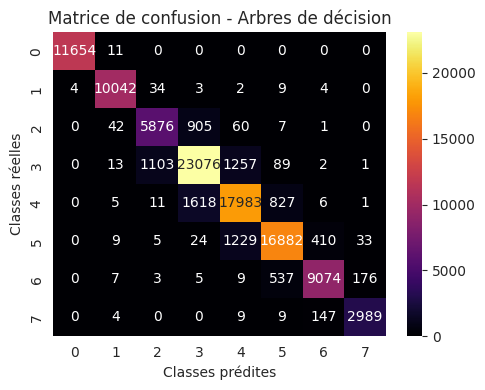


Entraînement du modèle Ada Boost...
Classification report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     11665
           1       0.99      0.77      0.87     10098
           2       0.39      0.31      0.34      6891
           3       0.62      0.67      0.65     25541
           4       0.53      0.57      0.55     20451
           5       0.60      0.59      0.60     18592
           6       0.63      0.53      0.58      9811
           7       0.71      0.81      0.76      3158

    accuracy                           0.65    106207
   macro avg       0.67      0.66      0.66    106207
weighted avg       0.65      0.65      0.65    106207



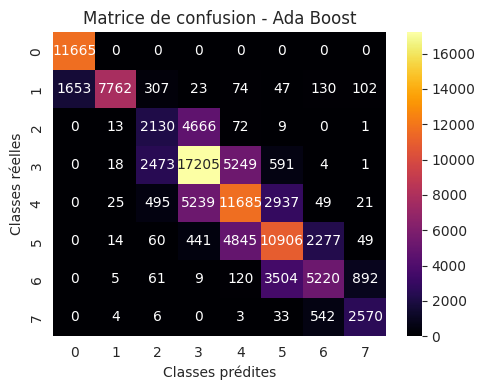


Entraînement du modèle BaggingClassifier...
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       0.99      0.99      0.99     10098
           2       0.85      0.84      0.85      6891
           3       0.90      0.91      0.90     25541
           4       0.88      0.88      0.88     20451
           5       0.92      0.91      0.92     18592
           6       0.94      0.94      0.94      9811
           7       0.95      0.94      0.95      3158

    accuracy                           0.92    106207
   macro avg       0.93      0.93      0.93    106207
weighted avg       0.92      0.92      0.92    106207



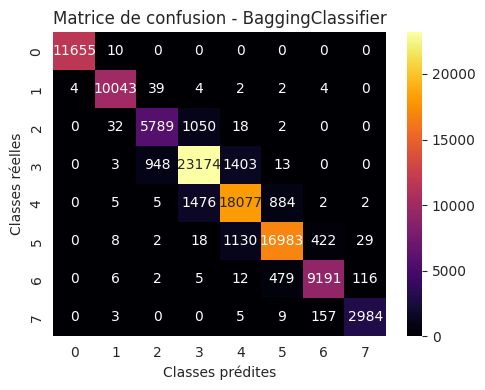


Entraînement du modèle XGB...
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       1.00      1.00      1.00     10098
           2       0.86      0.84      0.85      6891
           3       0.90      0.92      0.91     25541
           4       0.88      0.88      0.88     20451
           5       0.93      0.91      0.92     18592
           6       0.95      0.93      0.94      9811
           7       0.95      0.96      0.95      3158

    accuracy                           0.92    106207
   macro avg       0.93      0.93      0.93    106207
weighted avg       0.92      0.92      0.92    106207



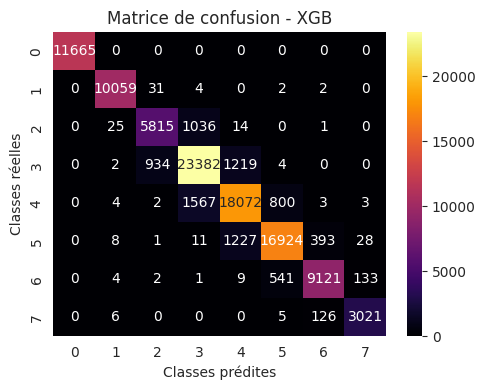


Résumé des performances :
                     Modèle  Accuracy_train  Accuracy_test  F1 Score
6                       XGB        0.931047       0.923282  0.930407
5         BaggingClassifier        0.948904       0.921747  0.928753
1  Random Forest Classifier        0.949954       0.921333  0.928805
3        Arbres de décision        0.949956       0.918734  0.925257
2                       KNN        0.925815       0.896947  0.905331
0       Logistic Regression        0.762282       0.762897  0.769626
4                 Ada Boost        0.648459       0.651021  0.658861


In [11]:
#Entrainement des premiers modèles
models={"Logistic Regression": LogisticRegression(),
        "Random Forest Classifier": RandomForestClassifier(),
        "KNN": KNeighborsClassifier(),
        "Arbres de décision": DecisionTreeClassifier(),
        "Ada Boost": AdaBoostClassifier(),
        "BaggingClassifier": BaggingClassifier(),
        "XGB":XGBClassifier()}
 
results = [] 

for name, model in models.items():  
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    print(f"\nEntraînement du modèle {name}...")
    print("Classification report")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="inferno", ax=ax)
    ax.set_xlabel('Classes prédites')
    ax.set_ylabel('Classes réelles')
    ax.set_title(f"Matrice de confusion - {name}")
    plt.tight_layout()
    plt.show() 
    
    results.append({  
        'Modèle': name,
        'Accuracy_train': model.score(X_train, y_train),
        'Accuracy_test': model.score(X_test, y_test),
        'F1 Score':f1_score(y_test, y_pred, average="weighted")
        })

results_df = pd.DataFrame(results).sort_values(by='Accuracy_test', ascending=False) 
print("\nRésumé des performances :") 
print(results_df)

# **Optimisation des seuils**

In [ ]:
#Comprendre le degré d'erreur
y_train_reg = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test_reg = pd.read_csv("../data/processed/y_test.csv").squeeze()

model=XGBClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

df_eval = pd.DataFrame({
    "y_test_reg": y_test_reg,
    "y_test_cat": y_test,
    "y_pred": y_pred
})

table_ranges = (
    df_eval
    .groupby(["y_test_cat", "y_pred"])["y_test_reg"]
    .agg(
        min_y_test="min",
        max_y_test="max",
        count="count"
    )
    .reset_index()
)
table_ranges

,y_test_cat,y_pred,min_y_test,max_y_test,count
0,0,0,0.0,0.0,11665
1,1,1,12.0,100.0,10059
2,1,2,88.0,100.0,31
3,1,3,95.0,98.0,4
4,1,5,25.0,54.0,2
5,1,6,26.0,32.0,2
6,2,1,101.0,114.0,25
7,2,2,101.0,120.0,5815
8,2,3,101.0,120.0,1036
9,2,4,108.0,120.0,14


In [53]:
#Trouver les seuils optimisé
def find_best_thresholds_multiclass(y_true, y_proba, step=0.01):
    thresholds = {}
    f1_scores = {}

    for c in range(8):
        best_t = 0.5
        best_f1 = 0.0

        y_true_bin = (y_true == c).astype(int)

        for t in np.arange(0.1, 0.9 + step, step):
            y_pred_bin = (y_proba[:, c] >= t).astype(int)
            f1 = f1_score(y_true_bin, y_pred_bin, zero_division=0)

            if f1 > best_f1:
                best_f1 = f1
                best_t = t

        thresholds[c] = best_t
        f1_scores[c] = best_f1

    return thresholds, f1_scores
    
thresholds, f1_per_class = find_best_thresholds_multiclass(y_true=y_test, y_proba=y_proba)

thresholds

{0: 0.19999999999999996,
 1: 0.5199999999999998,
 2: 0.4199999999999998,
 3: 0.44999999999999984,
 4: 0.44999999999999984,
 5: 0.5099999999999998,
 6: 0.43999999999999984,
 7: 0.5699999999999997}

In [55]:
def predict_with_class_thresholds(y_proba, thresholds):
    preds = []

    for row in y_proba:
        valid_classes = [
            c for c, p in enumerate(row) if p >= thresholds[c]
        ]

        if valid_classes:
            preds.append(valid_classes[np.argmax([row[c] for c in valid_classes])])
        else:
            preds.append(np.argmax(row))

    return np.array(preds)

y_pred_optimized = predict_with_class_thresholds(y_proba, thresholds)

print(classification_report(y_test, y_pred_optimized))
display(confusion_matrix(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       1.00      1.00      1.00     10098
           2       0.86      0.84      0.85      6891
           3       0.90      0.92      0.91     25541
           4       0.88      0.89      0.88     20451
           5       0.93      0.91      0.92     18592
           6       0.94      0.94      0.94      9811
           7       0.96      0.95      0.95      3158

    accuracy                           0.92    106207
   macro avg       0.93      0.93      0.93    106207
weighted avg       0.92      0.92      0.92    106207



array([[11665,     0,     0,     0,     0,     0,     0,     0],
       [    0, 10055,    35,     4,     0,     2,     2,     0],
       [    0,    19,  5821,  1036,    14,     0,     1,     0],
       [    0,     2,   934, 23382,  1219,     4,     0,     0],
       [    0,     3,     2,  1568, 18130,   742,     3,     3],
       [    0,     8,     1,    12,  1284, 16857,   402,    28],
       [    0,     4,     2,     1,     9,   506,  9185,   104],
       [    0,     6,     0,     0,     0,     5,   143,  3004]])

Les resultats du modèle XGBoost avec les seuils de base sont meilleurs que ceux avec les seuils optimisés. On continue le tunning des paramètres avec les seuils de base des modèles.

In [ ]:
# Optimisation des paramètres avec RandomizedSearchCV

X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=0.2, stratify=y_train, random_state=42)

model=XGBClassifier()

#Dictionnaire de paramètres 
parametres= {
    "max_depth": [4, 6, 8],
    "min_child_weight": [1, 3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [300, 600, 1000],
    "subsample": [0.7, 0.85, 1.0],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "gamma": [0, 1, 3],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [1, 2]
}

clf_rand = RandomizedSearchCV(model, parametres, n_iter = 20, cv=3, scoring="f1_weighted", random_state=42)
clf_rand.fit(X_sub,y_sub)

print("Meilleurs paramètres de la grille:",clf_rand.best_params_  )
print("Meilleurs score obtenu:",grid_clf. clf_rand.best_score_ )


In [8]:
# Optimisation des paramètres avec GridSearchCV
model=XGBClassifier()

#Dictionnaire de paramètres 
parametres= {
    "max_depth": [6, 8],
    "min_child_weight": [3, 5],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [600, 1000],
    "subsample": [0.85, 1.0],
    "colsample_bytree": [0.85, 1.0],
    "gamma": [1, 3],
    "reg_alpha": [0.1, 0.5],
    "reg_lambda": [1, 2]
}

grid_clf=GridSearchCV(estimator=model,param_grid=parametres, cv=4, scoring='accuracy', n_jobs=-1, verbose=2, error_score="raise") 
grille=grid_clf.fit(X_train,y_train)

#Toutes les combinaisons possibles d'hyperparamètres et la performance moyenne du modèle associé 
pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']] 

print("Meilleurs paramètres de la grille:",grid_clf.best_params_ )
print("Meilleurs score obtenu:",grid_clf. best_score_ )
 

Fitting 4 folds for each of 512 candidates, totalling 2048 fits


KeyboardInterrupt: 

In [18]:
# Optimisation des paramètres avec Optuna

X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=0.2, stratify=y_train, random_state=42)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),
        "reg_alpha": trial.suggest_float("reg_alpha",0, 0.5),
        "reg_lambda": trial.suggest_int("reg_lambda",1, 2),
    }


    model = XGBClassifier(
        **params,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    return cross_val_score(model, X_sub, y_sub, cv=3, scoring="f1_weighted").mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

study.best_params

[I 2025-12-16 22:42:09,821] A new study created in memory with name: no-name-0e04f203-1185-4da6-915b-ab69951588a7
[I 2025-12-16 22:43:42,611] Trial 0 finished with value: 0.9061078087124018 and parameters: {'n_estimators': 868, 'max_depth': 6, 'learning_rate': 0.03200907851911341, 'subsample': 0.637602618003939, 'colsample_bytree': 0.9216680073354744, 'gamma': 2.5268064543406576, 'min_child_weight': 4, 'reg_alpha': 0.41197592143457235, 'reg_lambda': 2}. Best is trial 0 with value: 0.9061078087124018.
[I 2025-12-16 22:45:00,435] Trial 1 finished with value: 0.9127338943677484 and parameters: {'n_estimators': 644, 'max_depth': 4, 'learning_rate': 0.06936876974991936, 'subsample': 0.8950665754710188, 'colsample_bytree': 0.8024352917508977, 'gamma': 0.30282057122061523, 'min_child_weight': 4, 'reg_alpha': 0.3257403318315486, 'reg_lambda': 2}. Best is trial 1 with value: 0.9127338943677484.
[I 2025-12-16 22:45:32,193] Trial 2 finished with value: 0.842841778480111 and parameters: {'n_estima

{'n_estimators': 356,
 'max_depth': 7,
 'learning_rate': 0.1506889252286455,
 'subsample': 0.8317586915689744,
 'colsample_bytree': 0.7757402104012932,
 'gamma': 0.4596810494949414,
 'min_child_weight': 3,
 'reg_alpha': 0.15888473710837642,
 'reg_lambda': 1}

In [ ]:
#best paramètres by Optuna : 
#{'n_estimators': 356, 'max_depth': 7, 'learning_rate': 0.1506889252286455, 'subsample': 0.8317586915689744, 'colsample_bytree': 0.7757402104012932,
#'gamma': 0.4596810494949414, 'min_child_weight': 3, 'reg_alpha': 0.15888473710837642, 'reg_lambda': 1}

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       0.99      1.00      1.00     10098
           2       0.87      0.86      0.86      6891
           3       0.91      0.92      0.91     25541
           4       0.89      0.89      0.89     20451
           5       0.93      0.91      0.92     18592
           6       0.95      0.93      0.94      9811
           7       0.95      0.96      0.95      3158

    accuracy                           0.93    106207
   macro avg       0.94      0.93      0.93    106207
weighted avg       0.93      0.93      0.93    106207



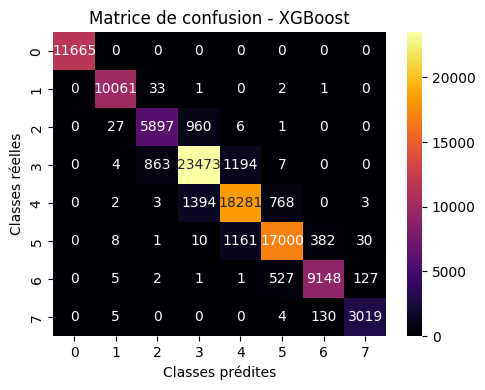

In [3]:
model = XGBClassifier(n_estimators= 356, max_depth= 7, learning_rate= 0.1506889252286455, subsample= 0.8317586915689744, colsample_bytree= 0.7757402104012932,
                      gamma= 0.4596810494949414, min_child_weight= 3, reg_alpha= 0.15888473710837642, reg_lambda= 1)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 

print("Classification report")
print(classification_report(y_test, y_pred))
    
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno", ax=ax)
ax.set_xlabel('Classes prédites')
ax.set_ylabel('Classes réelles')
ax.set_title("Matrice de confusion - XGBoost")
plt.tight_layout()
plt.show() 

In [13]:
#Early stopping

model = XGBClassifier(n_estimators= 1000, max_depth= 7, learning_rate= 0.1506889252286455, subsample= 0.8317586915689744, colsample_bytree= 0.7757402104012932,
                      gamma= 0.4596810494949414, min_child_weight= 3, reg_alpha= 0.15888473710837642, reg_lambda= 1)

model.fit(X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,  # stop si aucune amélioration après 50 rounds
    verbose=1)
y_pred = model.predict(X_test) 

[0]	validation_0-mlogloss:1.70359
[1]	validation_0-mlogloss:1.48371
[2]	validation_0-mlogloss:1.30795
[3]	validation_0-mlogloss:1.16402
[4]	validation_0-mlogloss:1.06033
[5]	validation_0-mlogloss:0.97023
[6]	validation_0-mlogloss:0.88973
[7]	validation_0-mlogloss:0.82684
[8]	validation_0-mlogloss:0.76932
[9]	validation_0-mlogloss:0.72141
[10]	validation_0-mlogloss:0.67616
[11]	validation_0-mlogloss:0.63967
[12]	validation_0-mlogloss:0.60725
[13]	validation_0-mlogloss:0.57901
[14]	validation_0-mlogloss:0.55037
[15]	validation_0-mlogloss:0.52580
[16]	validation_0-mlogloss:0.50131
[17]	validation_0-mlogloss:0.48219
[18]	validation_0-mlogloss:0.46469
[19]	validation_0-mlogloss:0.44700
[20]	validation_0-mlogloss:0.43314
[21]	validation_0-mlogloss:0.41919
[22]	validation_0-mlogloss:0.40774
[23]	validation_0-mlogloss:0.39596
[24]	validation_0-mlogloss:0.38431
[25]	validation_0-mlogloss:0.37414
[26]	validation_0-mlogloss:0.36377
[27]	validation_0-mlogloss:0.35540
[28]	validation_0-mlogloss:0.3

F1 score : 0.9282663437776244
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11665
           1       1.00      1.00      1.00     10098
           2       0.87      0.86      0.86      6891
           3       0.91      0.92      0.91     25541
           4       0.89      0.89      0.89     20451
           5       0.93      0.92      0.92     18592
           6       0.95      0.93      0.94      9811
           7       0.95      0.96      0.95      3158

    accuracy                           0.93    106207
   macro avg       0.94      0.93      0.93    106207
weighted avg       0.93      0.93      0.93    106207



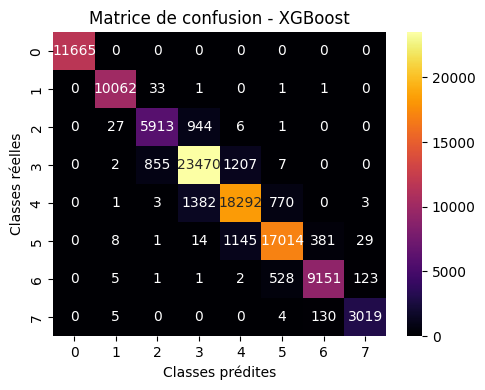

In [14]:
print("F1 score :",f1_score(y_test, y_pred, average="weighted") )
print("Classification report")
print(classification_report(y_test, y_pred))
    
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno", ax=ax)
ax.set_xlabel('Classes prédites')
ax.set_ylabel('Classes réelles')
ax.set_title("Matrice de confusion - XGBoost")
plt.tight_layout()
plt.show()

In [8]:
#Feature Importance
feats = {}  
for feature, importance in zip(X_train.columns, model.feature_importances_):  
    feats[feature] = importance  
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})  
importances.sort_values(by='Importance', ascending=False)

importances.head(30).plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance XGB")
plt.gca().invert_yaxis(); 
plt.tight_layout(); 
plt.show()

,Importance
Ft_PETROLPHEV,0.289299
Ft_ELECTRIC,0.240053
Fm_E,0.209534
Ft_DIESELPHEV,0.070592
ec (cm3),0.022463
Ft_PETROLELECTRIC,0.019962
Fm_P,0.018060
Fm_H,0.014722
Fm_F,0.014328
Ft_PETROL,0.013368


In [9]:
#Sélection de caractéristiques récursive 
from sklearn.feature_selection import RFE  
selector = RFE(model, n_features_to_select=50, step=1)  
selector = selector.fit(X_train, y_train)  
selector.get_feature_names_out() 

array(['m (kg)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)',
       'IT', 'W (mm)_missing', 'At1 (mm)_missing', 'At2 (mm)_missing',
       'Country_BE', 'Country_BG', 'Country_CY', 'Country_CZ',
       'Country_DE', 'Country_DK', 'Country_ES', 'Country_FI',
       'Country_FR', 'Country_GR', 'Country_HU', 'Country_IE',
       'Country_IS', 'Country_IT', 'Country_LT', 'Country_LV',
       'Country_MT', 'Country_NL', 'Country_NO', 'Country_PL',
       'Country_RO', 'Country_SE', 'Country_SI', 'Country_SK', 'Cr_M1G',
       'Ft_DIESELELECTRIC', 'Ft_DIESELPHEV', 'Ft_E85', 'Ft_ELECTRIC',
       'Ft_HYDROGEN', 'Ft_LPG', 'Ft_NG', 'Ft_PETROL', 'Ft_PETROLELECTRIC',
       'Ft_PETROLPHEV', 'Fm_E', 'Fm_F', 'Fm_H', 'Fm_M', 'Fm_P'],
      dtype=object)

[0]	validation_0-mlogloss:1.72253
[1]	validation_0-mlogloss:1.47788
[2]	validation_0-mlogloss:1.30997
[3]	validation_0-mlogloss:1.17247
[4]	validation_0-mlogloss:1.06054
[5]	validation_0-mlogloss:0.96699
[6]	validation_0-mlogloss:0.88646
[7]	validation_0-mlogloss:0.81821
[8]	validation_0-mlogloss:0.76028
[9]	validation_0-mlogloss:0.70943
[10]	validation_0-mlogloss:0.66485
[11]	validation_0-mlogloss:0.62608
[12]	validation_0-mlogloss:0.59137
[13]	validation_0-mlogloss:0.56138
[14]	validation_0-mlogloss:0.53526
[15]	validation_0-mlogloss:0.51402
[16]	validation_0-mlogloss:0.49335
[17]	validation_0-mlogloss:0.47574
[18]	validation_0-mlogloss:0.45651
[19]	validation_0-mlogloss:0.44163
[20]	validation_0-mlogloss:0.42646
[21]	validation_0-mlogloss:0.41392
[22]	validation_0-mlogloss:0.40151
[23]	validation_0-mlogloss:0.39038
[24]	validation_0-mlogloss:0.38031
[25]	validation_0-mlogloss:0.37046
[26]	validation_0-mlogloss:0.36154
[27]	validation_0-mlogloss:0.35356
[28]	validation_0-mlogloss:0.3

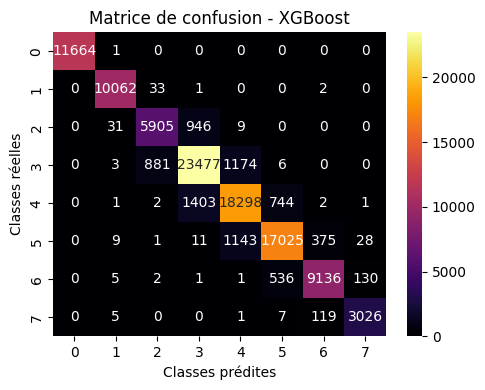

In [12]:
#test des performances du modèle suite à la sélection de caractéristiques récursive 
X_train_selected = X_train[selector.get_feature_names_out()] 
X_test_selected = X_test[selector.get_feature_names_out()] 

model = XGBClassifier(n_estimators= 1000, max_depth= 7, learning_rate= 0.1506889252286455, subsample= 0.8317586915689744, colsample_bytree= 0.7757402104012932,
                      gamma= 0.4596810494949414, min_child_weight= 3, reg_alpha= 0.15888473710837642, reg_lambda= 1)

model.fit(X_train_selected, y_train,
    eval_set=[(X_test_selected, y_test)],
    early_stopping_rounds=50,  # stop si aucune amélioration après 50 rounds
    verbose=1)
y_pred = model.predict(X_test_selected) 

print("Classification report")
print(classification_report(y_test, y_pred))
    
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno", ax=ax)
ax.set_xlabel('Classes prédites')
ax.set_ylabel('Classes réelles')
ax.set_title("Matrice de confusion - XGBoost")
plt.tight_layout()
plt.show()

#Pas d'amelioration de performances concluentes, on continue avec toutes les features

# **Interpretabilité des resultats**

100%|===================| 39998/40000 [181:43<00:00]        

vals shape: (5000, 58, 8)
shap_arr shape (C,N,F): (8, 5000, 58)
Top 20 SHAP (|value| mean, all classes):


m (kg)              1.429149
ec (cm3)            1.097370
ep (KW)             0.492732
IT                  0.442982
Ft_PETROL           0.402377
W (mm)              0.371640
At1 (mm)            0.336894
Fm_P                0.317736
At2 (mm)            0.251429
Fm_H                0.247196
Ft_PETROLPHEV       0.151547
Fm_F                0.133095
Ft_ELECTRIC         0.116242
Cr_M1G              0.106200
Country_DE          0.078806
Country_IT          0.033277
Fm_E                0.030005
Country_ES          0.029720
Country_PL          0.024334
At2 (mm)_missing    0.020400
dtype: float64

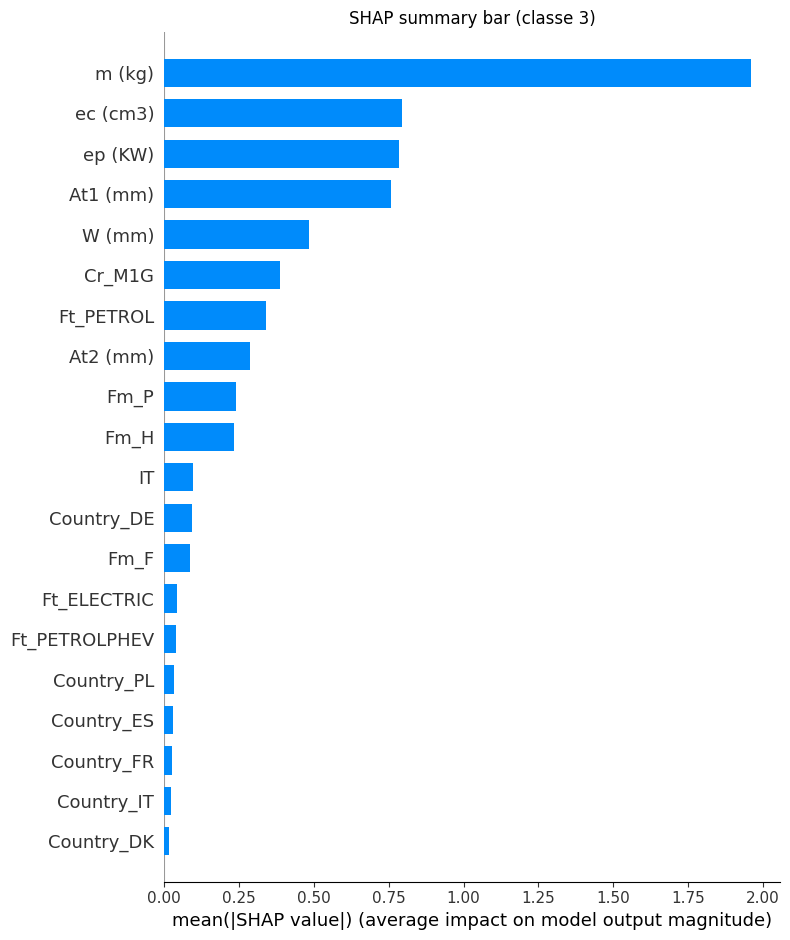

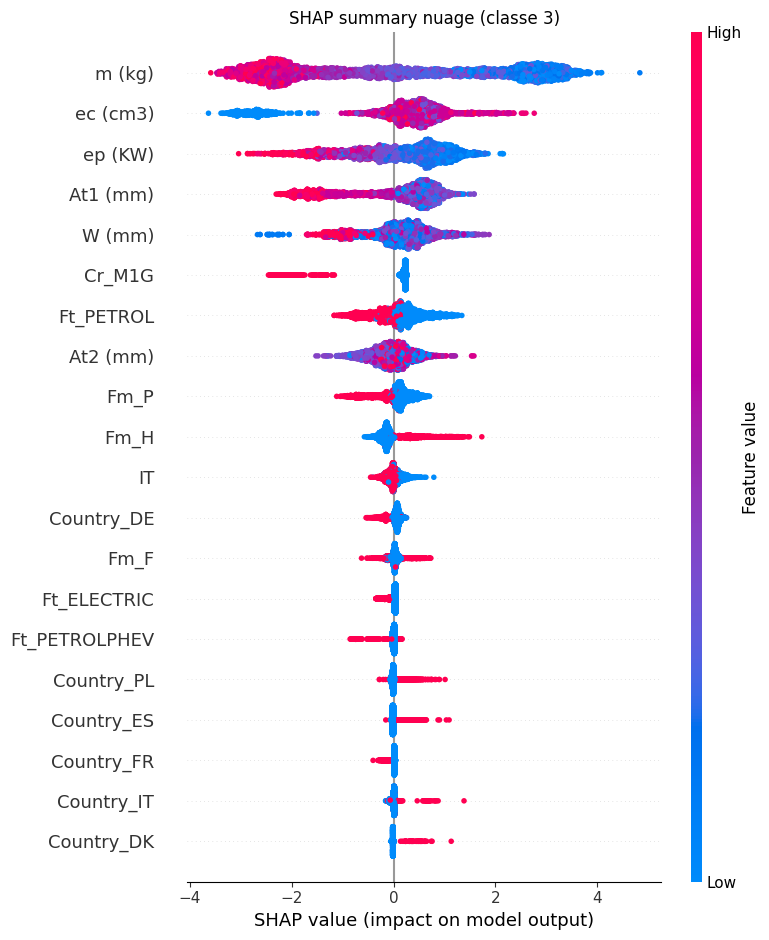

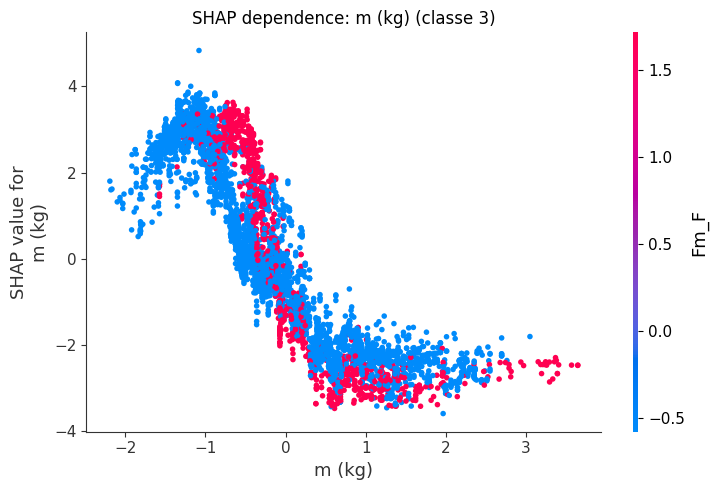

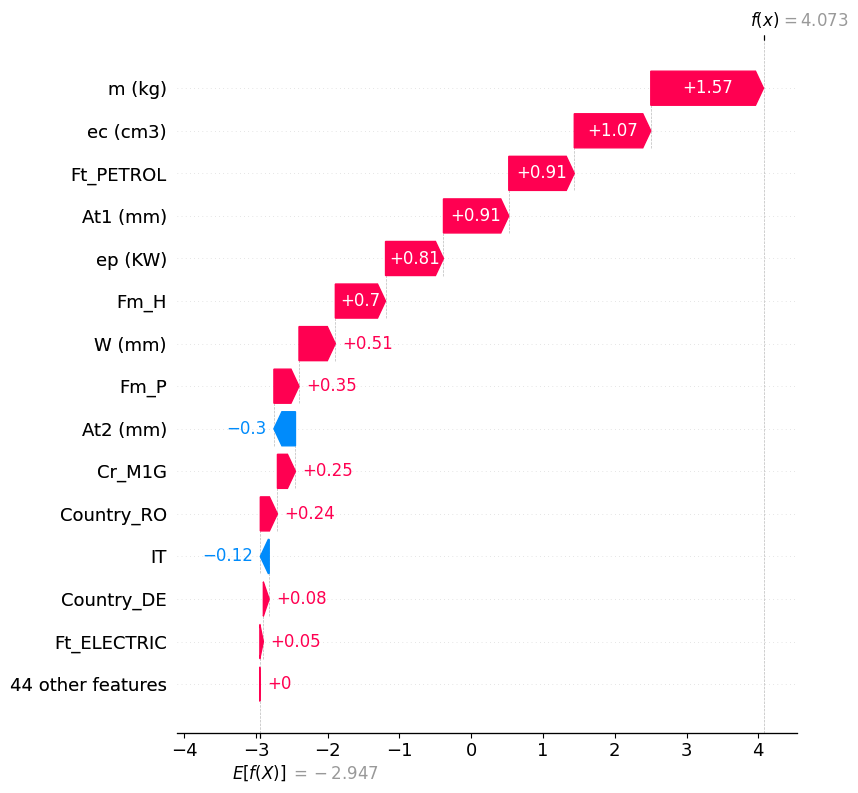

In [17]:
import shap

n_features = X_test.shape[1]
n_classes = len(getattr(model, "classes_", np.unique(y_test)))

# Échantillon pour SHAP
rng = np.random.default_rng(42)
sample_size = min(5000, len(X_test))
idx = rng.choice(len(X_test), size=sample_size, replace=False)
X_exp = X_test.iloc[idx]
y_exp = np.ravel(y_test)[idx]

explainer = shap.Explainer(model, X_train)
explanation = explainer(X_exp, check_additivity=False)
vals = np.array(explanation.values)
print("vals shape:", vals.shape)

def normalize_shap(vals, n_features, n_classes):
    if vals.ndim == 2:  # (N, F) binaire
        return vals[np.newaxis, ...]  # (1, N, F)
    if vals.ndim != 3:
        raise ValueError(f"Shape SHAP inattendue: {vals.shape}")
    dims = vals.shape
    feat_axes = [i for i, d in enumerate(dims) if d == n_features] or [int(np.argmax(dims))]
    f_ax = feat_axes[0]
    cls_axes = [i for i, d in enumerate(dims) if d == n_classes and i != f_ax]
    c_ax = cls_axes[0] if cls_axes else None
    axes_all = [0, 1, 2]
    s_ax = next(a for a in axes_all if a not in [f_ax, c_ax])
    if c_ax is None:
        return np.moveaxis(vals, [s_ax, f_ax], [1, 2])[np.newaxis, ...]
    return np.moveaxis(vals, [c_ax, s_ax, f_ax], [0, 1, 2])

shap_arr = normalize_shap(vals, n_features, n_classes)  # (C, N, F)
print("shap_arr shape (C,N,F):", shap_arr.shape)

# Importance globale |mean|
shap_imp_mean = np.mean(np.abs(shap_arr), axis=(0, 1))
shap_imp_series = pd.Series(shap_imp_mean, index=X_exp.columns).sort_values(ascending=False)
print("Top 20 SHAP (|value| mean, all classes):")
display(shap_imp_series.head(20))

# Classe majoritaire
cls_idx = int(np.bincount(y_exp).argmax())
cls_sv = shap_arr[cls_idx if shap_arr.shape[0] > 1 else 0]

# SHAP bar + nuage
shap.summary_plot(cls_sv, X_exp, plot_type="bar", show=False)
plt.title(f"SHAP summary bar (classe {cls_idx})"); plt.tight_layout(); plt.show()
shap.summary_plot(cls_sv, X_exp, show=False)
plt.title(f"SHAP summary nuage (classe {cls_idx})"); plt.tight_layout(); plt.show()

# Dépendance sur la feature la plus importante
feat_key = shap_imp_series.index[0]
shap.dependence_plot(feat_key, cls_sv, X_exp, show=False)
plt.title(f"SHAP dependence: {feat_key} (classe {cls_idx})"); plt.tight_layout(); plt.show()

# Waterfall local : base_value scalaire pour le point i et la classe prédite
i = 0
cls_pred = int(model.predict(X_exp.iloc[[i]])[0])
sv_pred = shap_arr[cls_pred if shap_arr.shape[0] > 1 else 0]

base_vals = np.array(explanation.base_values)
if base_vals.ndim == 0:
    base = float(base_vals)
elif base_vals.ndim == 1:
    base = float(base_vals[cls_pred]) if base_vals.shape[0] == n_classes else float(base_vals[i])
elif base_vals.ndim == 2:
    # (N, C) ou (C, N)
    if base_vals.shape[0] == len(X_exp) and base_vals.shape[1] == n_classes:
        base = float(base_vals[i, cls_pred])
    elif base_vals.shape[0] == n_classes and base_vals.shape[1] == len(X_exp):
        base = float(base_vals[cls_pred, i])
    else:
        base = float(base_vals.ravel()[0])
else:
    base = float(base_vals.ravel()[0])

shap.plots._waterfall.waterfall_legacy(
    base, sv_pred[i], feature_names=X_exp.columns, max_display=15, show=True
)
